In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Load the dataset
data = pd.read_csv('/content/netflix1.csv' , encoding='latin-1')

# Display the first few rows of the dataset
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [ ]:
# previous data type
print(data.dtypes)

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object


In [ ]:
# Check for missing values
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [ ]:
# Drop duplicates if any

data.drop_duplicates(inplace=True)



# data.duplicated().sum()

In [ ]:
# Drop rows with missing critical information
# Check if 'cast' column exists before dropping
if 'cast' in data.columns:
    data.dropna(subset=['director', 'cast', 'country'], inplace=True)
else:
    print("Warning: 'cast' column not found in the DataFrame. Skipping dropna for 'cast'.")
    # Optionally, you could drop rows based on the remaining existing columns
    # data.dropna(subset=['director', 'country'], inplace=True)

In [ ]:
# Drop rows with missing critical information
data.dropna(subset=['director' , 'type', 'title', 'date_added',
                    'release_year', 'rating', 'duration',
                    'listed_in',  'country'], inplace=True)
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
genres          0
dtype: int64


In [ ]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'])
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States 2021-09-25          2020  PG-13    90 min   
1         France 2021-09-24          2021  TV-MA  1 Season   
2  United States 2021-09-24          2021  TV-MA  1 Season   
3         Brazil 2021-09-22          2021  TV-PG    91 min   
4  United States 2021-09-24          1993  TV-MA   125 min   

                                           listed_in  \
0                                      Documentaries   
1  Crime TV Shows, International TV Shows, TV Act...   
2                 TV

In [ ]:
# Show data types to confirm changes
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
genres                  object
dtype: object


# Step 4: Exploratory Data Analysis (EDA)
1. Content Type Distribution (Movies vs. TV Shows)

In [ ]:
# Count the number of Movies and TV Shows

type_counts = data['type'].value_counts()
print(type_counts)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


<ipython-input-21-0c8b2a993995>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


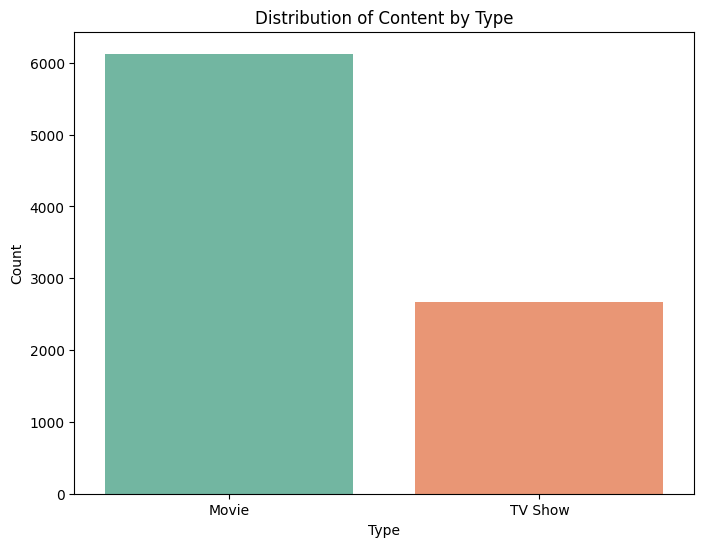

In [ ]:
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

2. Most Common Genres

In [ ]:
# Split the 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)
print(genre_counts)

International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


<ipython-input-50-da3132eebd31>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index,palette='Set2')


Text(0, 0.5, 'Genre')

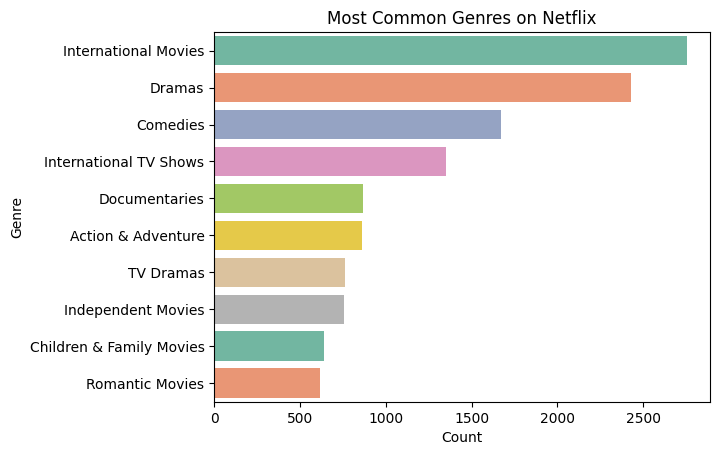

In [ ]:
# Plot the most common genres
# plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index,palette='Set2')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')

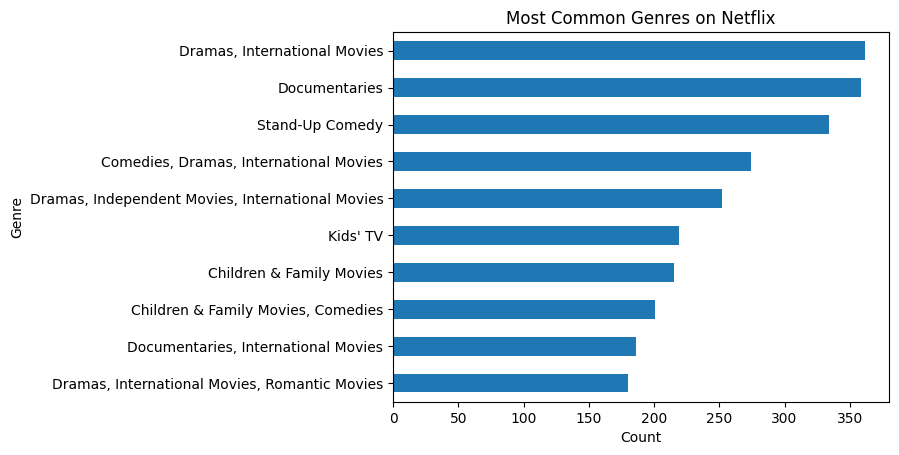

In [ ]:
# Plot the most common genres
data['listed_in'].value_counts().head(10).sort_values().plot(kind='barh')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

3. Content Added Over Time

In [ ]:
# Extract year and month from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States 2021-09-25          2020  PG-13    90 min   
1         France 2021-09-24          2021  TV-MA  1 Season   
2  United States 2021-09-24          2021  TV-MA  1 Season   
3         Brazil 2021-09-22          2021  TV-PG    91 min   
4  United States 2021-09-24          1993  TV-MA   125 min   

                                           listed_in  \
0                                      Documentaries   
1  Crime TV Shows, International TV Shows, TV Act...   
2                 TV

<ipython-input-59-1c6edc1d8fb4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=data, palette='coolwarm')


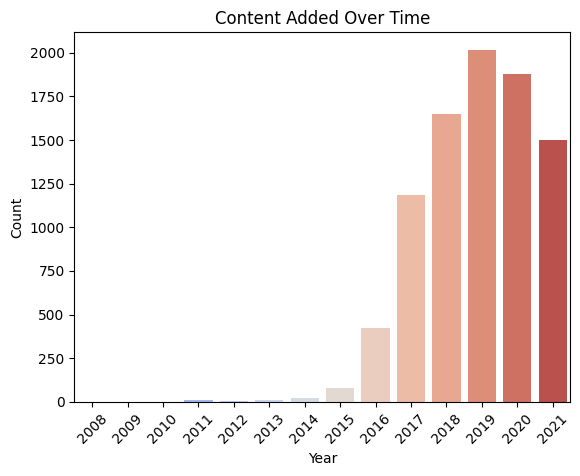

In [ ]:
# Plot content added over the years
# plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

4. Top 10 Directors with the Most Titles

In [ ]:
# Count titles by director
top_directors = data['director'].value_counts().head(10)
print(top_directors)

director
Not Given                  2588
Rajiv Chilaka                20
Alastair Fothergill          18
RaÃºl Campos, Jan Suter      18
Marcus Raboy                 16
Suhas Kadav                  16
Jay Karas                    14
Cathy Garcia-Molina          13
Jay Chapman                  12
Martin Scorsese              12
Name: count, dtype: int64


5. Word Cloud of Movie Titles


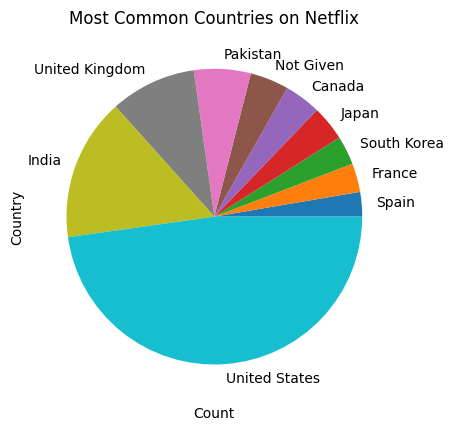

In [ ]:
# content distribution by countries

data['country'].value_counts().head(10).sort_values().plot(kind='pie')
plt.title('Most Common Countries on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

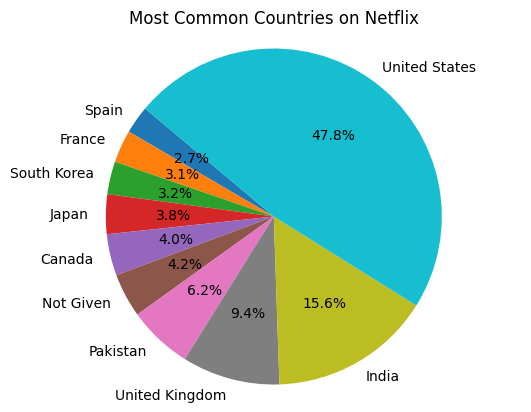

In [ ]:
# content distribution by countries

country_counts = data['country'].value_counts().head(10)
country_counts.sort_values().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Most Common Countries on Netflix')
plt.ylabel('')
plt.axis('equal')
plt.show()

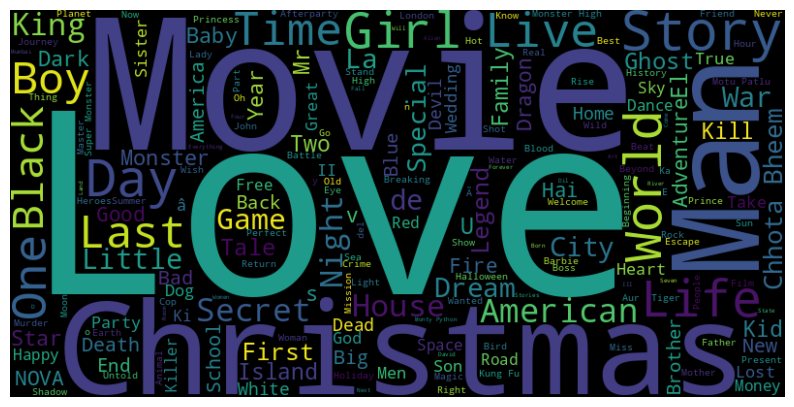

In [ ]:
# Generate word cloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400,
background_color='black').generate(' '.join(movie_titles))

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()